In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt

import importlib

from astroLuSt.synthetics import dataaugmentation as ald


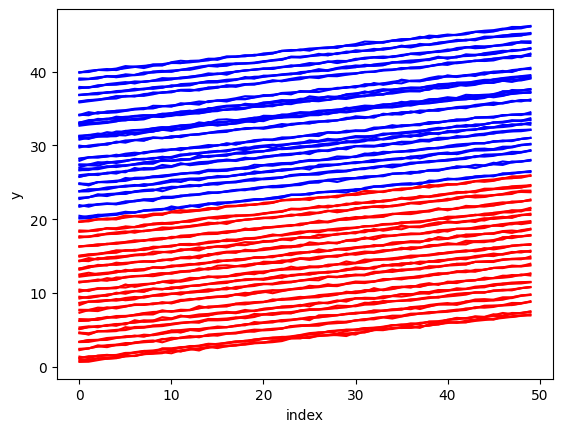

In [328]:
def generate_4d(
    shape:tuple=None,
    xmin:float=0, xmax:float=1,
    func=None
    ):
    if shape is None:
        shape = (1,20,1,1)
    if func is None:
        func = lambda x: x
    X = np.empty(shape)
    for i, xi in enumerate(X):
        x_ = np.linspace(np.zeros((X.shape[-2],X.shape[-1]))+xmin, xmax, X.shape[1])
        
        hshift = np.random.rand(x_.shape[1]).reshape(1,-1,1)
        vshift = np.zeros_like(x_)+i
        cnoise = np.random.randn(x_.shape[0], x_.shape[2]).reshape(50,1,-1)*0.1
        vshift[:,1,:] += X.shape[0]
        X[i] = func(x_+hshift) + vshift + cnoise

    return X

X = generate_4d(
    shape=(20,50,2,3),
    xmin=0, xmax=2*np.pi,
    # func=np.sin,
    func=None,
)

#visualize
fig = plt.figure()
ax1 = fig.add_subplot(111)
for x in X:
    ax1.plot(x[:,0,:], 'r-')
    # ax1.plot(x[:,1,0], 'r-')
    ax1.plot(x[:,1,:], 'b-')
ax1.set_xlabel('index')
ax1.set_ylabel('y')
plt.show()

(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)


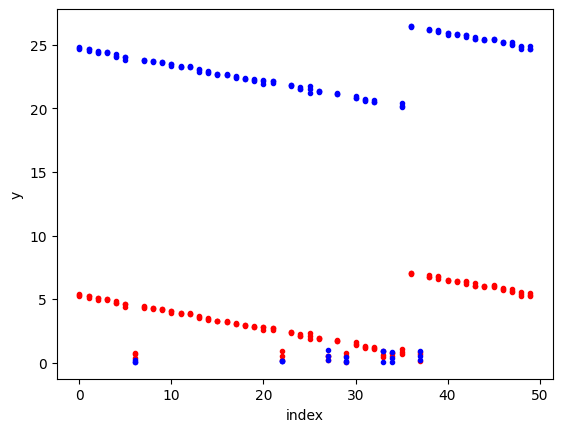

In [457]:
importlib.reload(ald)
AA = ald.AugmentAxis(
    nsamples=50, sample_weights=None,
    shift=(0,20),
    npoints=5, neighbors=False,
    fill_value=1, fill_value_range=(0,1),
    axis=0,
)

for i in range(20):
    x_ = AA.shift_features(X[0], shift=None, axis=0)
    x_ = AA.flip_axis(x_, axis=(0,2))
    x_ = AA.obscure_observations(
        x_,
        npoints=(0,10), neighbors=None,
        fill_value='random', fill_value_range=None,
        # fill_value=0, fill_value_range=None,
        axis=(0)
    )

#visualize
fig = plt.figure()
ax1 = fig.add_subplot(111)
# for x in X_:
# ax1.plot(X[0,:,0,:], 'r-')
# ax1.plot(X[0,:,1,:], 'b-')
ax1.plot(x_[:,0,:], 'r.')
ax1.plot(x_[:,1,:], 'b.')
ax1.set_xlabel('index')
ax1.set_ylabel('y')
plt.show()